# Telco Churn Analysis

### Module 1: Getting Started
###### Using Comments R/Python
###### Executing Commands R/Python
###### Importing Packages R/Python
###### Getting Data into R
###### Saving Output R/Python
###### Accessing Records and Variables R/Python

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
#getting data
import zipfile

with zipfile.ZipFile('Downloads\Telco.zip', 'r') as zip_ref:
    zip_ref.extractall('extract_folder')

In [3]:
#input dataset into dataframe
df = pd.read_excel('extract_folder/Telco_customer_churn.xlsx')

In [5]:
import os
extracted_files = os.listdir('extract_folder')
print(extracted_files)

['100990', 'data', 'dataset.csv', 'demographic_info.csv', 'diabetes_data.csv', 'EEG_data.csv', 'en.openfoodfacts.org.products.tsv', 'hypertension_data.csv', 'stroke_data.csv', 'StudentsPerformance.csv', 'survey.csv', 'Telco_customer_churn.xlsx', 'train.csv', 'videos', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'xAPI-Edu-Data.csv']


In [6]:
#accessing records
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [36]:
df['Internet Service'].value_counts()   

1    3096
0    2421
2    1526
Name: Internet Service, dtype: int64

In [7]:
df.shape

(7043, 33)

In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


#### Observations:

###### 77% customers Churned while 23% did not. 
###### 75% Customers are at high risk of churning.
###### 75% Customers are considered quite valuable to the company. 

In [7]:
df['Churn Label'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn Label, dtype: object

### Module 2: DATA PREPARATION

###### How to Add an Index Field Using R/Python
###### How to Change Misleading Field Values Using R/Python
###### How to Reexpress Categorical Field Values Using R/Python
###### How to Standardise Numeric Fields Using R/Python
###### How to Identify Outliers Using R/Python

In [76]:
#Handling null values
df.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Score           0
CLTV                  0
dtype: int64

In [78]:
df['Total Charges'].isnull().sum()

11

In [80]:
df['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)

In [7]:
# adding index
df['Index'] = range(1, len(df) + 1)
df = df[['Index'] + [col for col in df.columns if col != 'Index']]

In [8]:
df.head()

,Index,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,2,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,3,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,4,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,5,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
#dropping columns that are not significant (removing field not required)
df.drop(['CustomerID','Zip Code','Lat Long', 'Latitude', 'Longitude', 'Count', 'Churn Value','Churn Reason','State','Country'], axis = 1, inplace = True)

In [55]:
df.drop(['City'], axis=1, inplace = True)

In [10]:
df.columns

Index(['Index', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Score', 'CLTV'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   int32  
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   int32  
 4   Dependents         7043 non-null   int32  
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   int32  
 7   Multiple Lines     7043 non-null   int64  
 8   Internet Service   7043 non-null   int64  
 9   Online Security    7043 non-null   int64  
 10  Online Backup      7043 non-null   int64  
 11  Device Protection  7043 non-null   int64  
 12  Tech Support       7043 non-null   int64  
 13  Streaming TV       7043 non-null   int64  
 14  Streaming Movies   7043 non-null   int64  
 15  Contract           7043 non-null   int64  
 16  Paperless Billing  7043 

-> binary categorical field - partner, dependents, Phone service, Paperless Billing, Churn Label  
-> 3 or more variable categorical field - Internet Service,online security,  online backup,  Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract,Multiple Lines, payment method
-> objects but int - Total Charges


In [39]:
df['Gender'].value_counts()   

Male      3555
Female    3488
Name: Gender, dtype: int64

In [12]:
#reexpressing binary categorical field
from sklearn.preprocessing import LabelEncoder
binary_columns = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']

label_encoder = LabelEncoder()

for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
df.head()

,Index,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV
0,1,Los Angeles,Male,No,0,0,2,1,No,DSL,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,86,3239
1,2,Los Angeles,Female,No,0,1,2,1,No,Fiber optic,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,67,2701
2,3,Los Angeles,Female,No,0,1,8,1,Yes,Fiber optic,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,1,86,5372
3,4,Los Angeles,Female,No,1,1,28,1,Yes,Fiber optic,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1,84,5003
4,5,Los Angeles,Male,No,0,1,49,1,Yes,Fiber optic,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1,89,5340


In [14]:
#reexpressing binary categorical field
for column in ['Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Multiple Lines','Senior Citizen', 'Gender','Payment Method']:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
#reexpressing categorical field
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [16]:
df.drop(['Index'],axis=1,inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   int32  
 2   Senior Citizen     7043 non-null   int32  
 3   Partner            7043 non-null   int32  
 4   Dependents         7043 non-null   int32  
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   int32  
 7   Multiple Lines     7043 non-null   int32  
 8   Internet Service   7043 non-null   int32  
 9   Online Security    7043 non-null   int32  
 10  Online Backup      7043 non-null   int32  
 11  Device Protection  7043 non-null   int32  
 12  Tech Support       7043 non-null   int32  
 13  Streaming TV       7043 non-null   int32  
 14  Streaming Movies   7043 non-null   int32  
 15  Contract           7043 non-null   int32  
 16  Paperless Billing  7043 

In [43]:
df.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Score', 'CLTV'],
      dtype='object')

In [18]:
#standardizing numerical fields
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Total Charges']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [22]:
#outlier treatment
from scipy.stats import zscore

numeric_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']
z_scores = np.abs(zscore(df[numeric_columns]))

threshold = 3
outlier_indices = np.where(z_scores > threshold)
print("Outlier indices:", outlier_indices)


Outlier indices: (array([], dtype=int64), array([], dtype=int64))


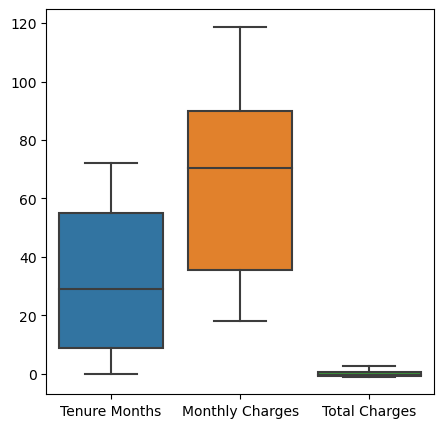

In [24]:
numeric_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']

plt.figure(figsize=(5,5))
sns.boxplot(data=df[numeric_columns])
plt.show()


# module 3: EXPLORATORY DATA ANALYSIS

##### How to Construct a Bar Graph with Overlay Using R/Python
##### How to Construct Contingency Tables Using R/Python
##### How to Construct Histograms with Overlay Using R/Python
##### How to Perform Binning Based on Predictive Value Using R/Python


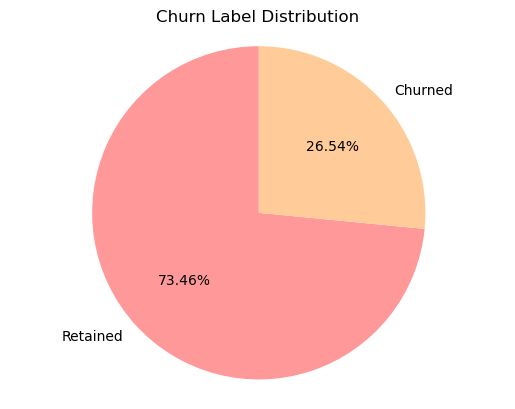

In [25]:
#Constructing pie chart
labels = ['Retained', 'Churned']
sizes = [5174, 1869]

plt.pie(sizes, labels = labels, autopct = '%1.2f%%', startangle = 90, colors = ['#ff9999', '#ffcc99'])

plt.axis('equal')
plt.title('Churn Label Distribution')
plt.show()

#### Data is highly imbalanced with a ratio of 73:26

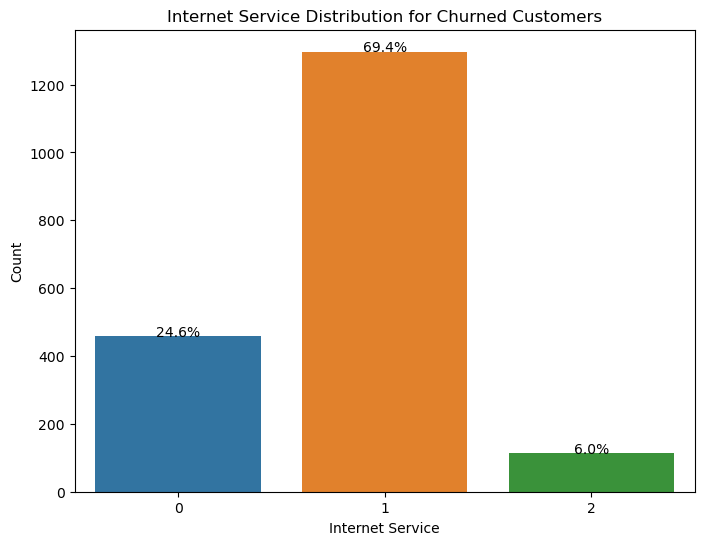

In [35]:
#Constructing a bar graph
churned_data = df[df['Churn Label'] == 1]
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Internet Service', data=churned_data)
plt.title('Internet Service Distribution for Churned Customers')
plt.xlabel('Internet Service')
plt.ylabel('Count')

total = len(churned_data['Internet Service'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.1%}', ha="center")

plt.show()

Observations:
    Internet service of people who churned:
        69.4% people use fiber optics,
        24.6% people use DSL, while 6% use some other. 

In [37]:
# Creating contingency table
cols = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label', 'Gender', 'Senior Citizen', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Multiple Lines', 'Payment Method']
for col1 in cols:
    for col2 in cols:
        if col1 != col2:  
            contingency_table = pd.crosstab(df[col1], df[col2], margins=True, margins_name='Total')
            print(f"\nContingency Table for {col1} and {col2}:\n{contingency_table}\n")



Contingency Table for Partner and Dependents:
Dependents     0     1  Total
Partner                      
0           3339   302   3641
1           2077  1325   3402
Total       5416  1627   7043


Contingency Table for Partner and Phone Service:
Phone Service    0     1  Total
Partner                        
0              371  3270   3641
1              311  3091   3402
Total          682  6361   7043


Contingency Table for Partner and Paperless Billing:
Paperless Billing     0     1  Total
Partner                             
0                  1459  2182   3641
1                  1413  1989   3402
Total              2872  4171   7043


Contingency Table for Partner and Churn Label:
Churn Label     0     1  Total
Partner                       
0            2441  1200   3641
1            2733   669   3402
Total        5174  1869   7043


Contingency Table for Partner and Gender:
Gender      0     1  Total
Partner                   
0        1800  1841   3641
1        1688  1714   3

Observations between partner and churn label: 
    Total people with no partner who havent churned are: 2441
    Total people who have churned and have partner are: 669
    

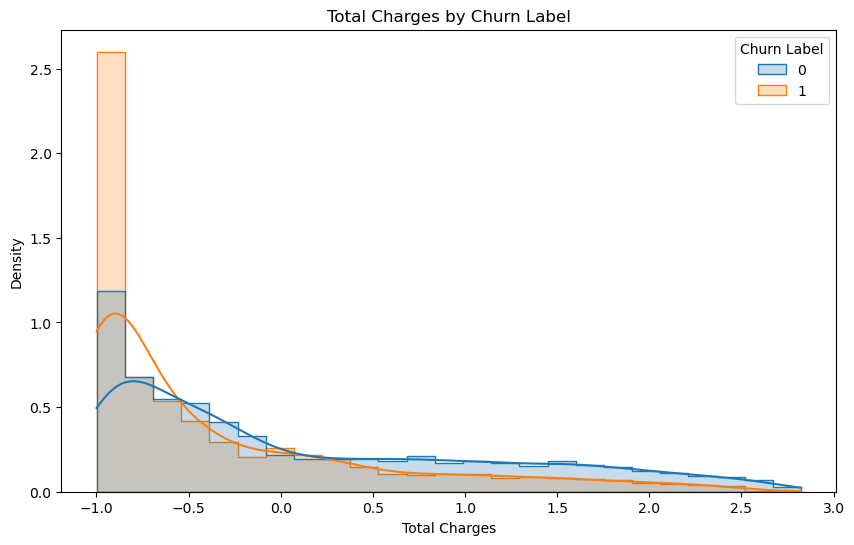

In [40]:
# Constructing histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Charges', hue='Churn Label', element='step', stat='density', common_norm=False, kde=True)
plt.title('Total Charges by Churn Label')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()

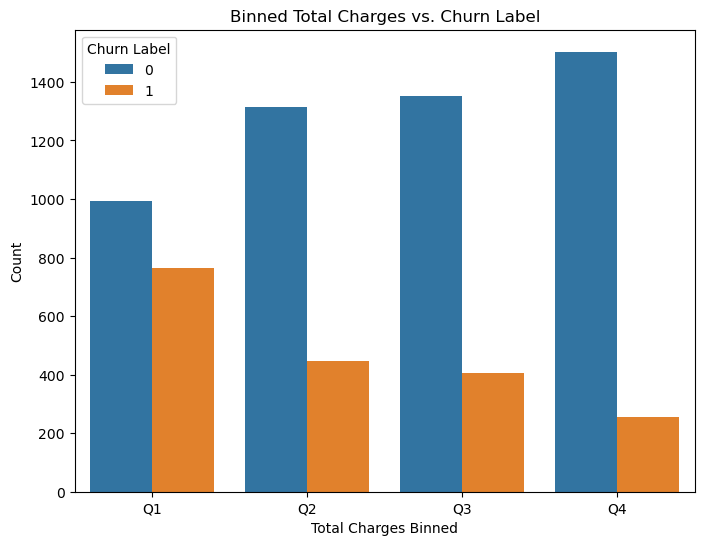

In [49]:
df['Total Charges Binned'] = pd.qcut(df['Total Charges'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.figure(figsize=(8,6))
sns.countplot(x='Total Charges Binned', hue='Churn Label', data=df)
plt.title('Binned Total Charges vs. Churn Label')
plt.xlabel('Total Charges Binned')
plt.ylabel('Count')
plt.legend(title='Churn Label')
plt.show()

In [70]:
df.drop(['Tenure Months Binned'],axis=1, inplace = True)

In [ ]:
df.drop(['Total Charges Binned'], axis = 1, inplace = True

# Module 4: Data Preparation phase 
##### How to Partition the Data R/Python
##### How to Balance the Training Data Set R/Python
##### How to Build CART Decision Trees Using R/Python
##### How to Build C5.0 Decision Trees Using R/Python
##### How to Build Random Forests R/Python



In [81]:
#Partioning the data
from sklearn.model_selection import train_test_split
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [82]:
#Balancing the Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5634, 21)
Testing set shape: (1409, 21)


In [83]:
#Building CART Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8992


The accuracy using this model is 89%

In [88]:
#Building Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8992


In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [92]:
rf_classifier_tuned = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)
rf_classifier_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_classifier_tuned.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(accuracy_rf_tuned)

0.9297374024130589


The random forest is performing with an accuracy of 92% now

# Module 5: MODEL EVALUATION

#### How to Perform Model Evaluation Using R/Python
#### Accounting for Unequal Error Costs Using R/Python


In [94]:
# Model Evaluation
matrix = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[967  42]
 [ 57 343]]


Observation: 967 instances correctly predicted
             42 instances incorrect
        
             52 instances incorrect for not churn 
             343 correct

In [97]:
class_report = classification_report(y_test, y_pred_rf_tuned)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.89      0.86      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



In [106]:
#accounting for unequal error costs
from sklearn.metrics import f1_score
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted)
    print(f"Threshold: {threshold:.2f}, F1-Score: {f1:.4f}")

Threshold: 0.10, F1-Score: 0.7694
Threshold: 0.20, F1-Score: 0.8508
Threshold: 0.30, F1-Score: 0.8681
Threshold: 0.40, F1-Score: 0.8700
Threshold: 0.50, F1-Score: 0.8739
